# What is the average number of games per set in men's matches compared to women's matches?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

p_by_p_dataframe = pd.DataFrame()
for file in os.listdir("raw/raw_point_by_point_parquet"):
    single_stats = pd.read_parquet("raw/raw_point_by_point_parquet/" + file)
    p_by_p_dataframe = pd.concat([p_by_p_dataframe, single_stats], axis= 'rows', ignore_index=True)


In [2]:
# ادغام دیتافریم p_by_p با اطلاعات تیم میزبان و تیم مهمان بر اساس match_id
merged_home = p_by_p_dataframe.merge(home_team_dataframe[['match_id', 'gender']], on='match_id', how='left', suffixes=('', '_home'))
merged_data = merged_home.merge(away_team_dataframe[['match_id', 'gender']], on='match_id', how='left', suffixes=('', '_away'))
merged_data
# ترکیب اطلاعات جنسیت (مدیریت مقادیر نال احتمالی)
merged_data['gender'] = merged_data['gender'].fillna(merged_data['gender_away'])
merged_data = merged_data.drop(['gender_away'], axis=1)
merged_data

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring,gender
0,11674074,2,7,0,0,15,2,5,1,6,1,1,1,F
1,11674074,2,7,1,0,30,0,5,1,6,1,1,1,F
2,11674074,2,7,2,15,30,1,1,5,6,1,1,1,F
3,11674074,2,7,3,30,30,0,1,5,6,1,1,1,F
4,11674074,2,7,4,40,30,0,3,5,6,1,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22875,11703525,1,2,1,0,30,0,5,1,1,1,2,2,M
22876,11703525,1,2,2,0,40,0,5,1,1,1,2,2,M
22877,11703525,1,1,0,15,0,0,1,5,1,0,1,1,M
22878,11703525,1,1,1,30,0,0,1,5,1,0,1,1,M


In [3]:
# گروه‌بندی بر اساس match_id، set_id، و gender برای شمارش گیم‌های یکتا در هر ست
games_per_set = merged_data.groupby(['match_id', 'set_id', 'gender'])['game_id'].nunique().reset_index()
print("Games per set:\n", games_per_set.head())

# محاسبه میانگین تعداد گیم‌ها در هر ست برای هر جنسیت
average_games = games_per_set.groupby('gender')['game_id'].mean().reset_index()
average_games.columns = ['Gender', 'Average_Games_Per_Set']
print("Average games per set by gender:\n", average_games)

Games per set:
    match_id  set_id gender  game_id
0  11674074       1      F       12
1  11674074       2      F        7
2  11674103       1      M       10
3  11674103       2      M        8
4  11674105       1      M       13
Average games per set by gender:
   Gender  Average_Games_Per_Set
0      F               8.493927
1      M               8.596774


In [4]:
# بررسی match_idهای موجود در هر جدول
missing_in_home = p_by_p_dataframe[~p_by_p_dataframe['match_id'].isin(home_team_dataframe['match_id'])]
missing_in_away = p_by_p_dataframe[~p_by_p_dataframe['match_id'].isin(away_team_dataframe['match_id'])]

print("Missing in home team dataframe:\n", missing_in_home['match_id'].unique())
print("Missing in away team dataframe:\n", missing_in_away['match_id'].unique())


Missing in home team dataframe:
 [11699098 11699099 11699101 11699103 11699104 11699105 11699106 11699110
 11699153 11699157 11699161 11699166 11699167 11699168 11699188 11699192
 11699193 11699195 11699196 11699200 11701486 11701487 11701490 11701491
 11701492 11701494 11701496 11701497 11701540 11701543 11701562 11701563
 11701606 11701631 11701643 11701653 11701655 11701781 11701783 11703221
 11703242 11703444]
Missing in away team dataframe:
 [11699098 11699099 11699100 11699102 11699104 11699107 11699108 11699109
 11699110 11699111 11699112 11699113 11699157 11699158 11699159 11699160
 11699161 11699162 11699166 11699168 11699191 11699194 11701486 11701487
 11701490 11701491 11701492 11701497 11701499 11701536 11701539 11701541
 11701542 11701559 11701562 11701563 11701608 11701609 11701610 11701611
 11701613 11701626 11701631 11701632 11701635 11701643 11701645 11701646
 11701648 11701655 11701656 11701784 11701786 11701787 11701841 11701877
 11701924 11701933 11703221 11703242 1

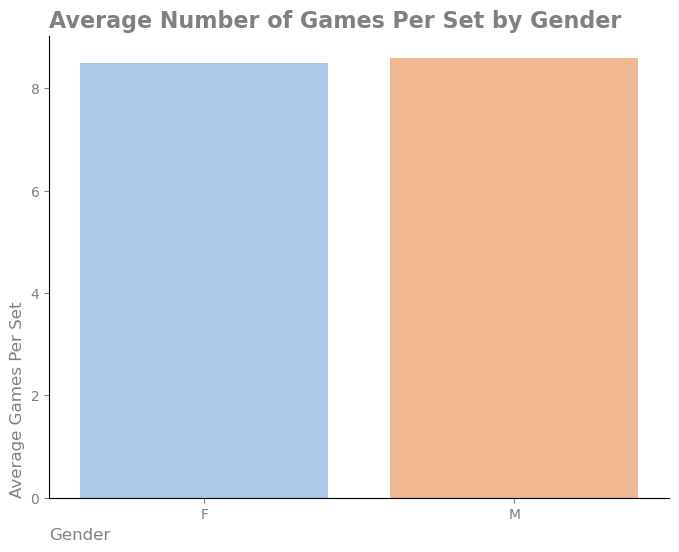

In [9]:

# رسم نمودار میله‌ای برای نمایش میانگین گیم‌ها در هر ست بر اساس جنسیت
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Average_Games_Per_Set', data=average_games, palette='pastel')

# اضافه کردن عنوان و لیبل‌ها
plt.title('Average Number of Games Per Set by Gender', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Gender', fontsize=12, color='gray', loc='left')
plt.ylabel('Average Games Per Set', fontsize=12, color='gray', loc='bottom')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tick_params(colors='gray')
# نمایش نمودار
plt.show()


The output shows that the average number of games per set is approximately 8.49 for women's matches and about 8.60 for men's matches. This small difference suggests that the number of games per set is quite similar between men's and women's matches, but on average, men's matches have slightly more games per set.

#### 1. Analysis:
- **Minor Difference**: The average number of games per set is only slightly higher for men (8.60 compared to 8.49 for women). This small difference could reflect differences in gameplay style or possibly the rules governing men's and women's matches. It might also be influenced by factors such as service power or differing strategies.

#### 2. Interpreting the Result:

- **Men's Matches**: Games may last slightly longer in men's matches due to stronger serves and faster-paced rallies, leading to more points being played. Additionally, men might engage in longer duels, which could extend the number of games in each set.
- **Women's Matches**: Since the average number of games is slightly lower, women’s matches might be more focused on technique and strategy, potentially resulting in shorter games.

#### 3. Differences in Strategy and Style:

- Although the difference in averages is small, it could indicate variations in the strategies used in men's and women's matches. Men's matches, which tend to involve more physical play and stronger serves, might lead to more games being extended to deuce and result in more points being played per game.

**Conclusion**:
Overall, the difference in average games per set between men's and women's matches is minimal, indicating that both are similarly challenging and competitive.